In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [68]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [92]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#Objective: Understand the relationship between product categories and their best-seller status.
#Crosstab Analysis:
#Create a crosstab between the product category and the isBestSeller status.
crosstab = pd.crosstab(df['category'], df['isBestSeller']).head(20)
display(crosstab)

#Are there categories where being a best-seller is more prevalent?
crosstab = pd.crosstab(df['category'], df['isBestSeller']).sort_values(by=True, ascending=False).head(20)
display(crosstab)
# Grocery, Health and Personal care, baby, Sports and Outdoor and Power and hand tools are the 5 categories where being a best-seller is more prevalent.
#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])
sorted_crosstab = crosstab.sort_values(by=True, ascending=False).head(20)

sorted_crosstab


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
Agricultural Equipment & Supplies,8421,109
Alexa Built-In Devices,106,1
Art & Craft Supplies,253,5
Arts & Crafts,9319,230


isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.058135
Health & Personal Care,9017,552,0.057686
Baby,14709,341,0.022658
Sports & Outdoors,835935,330,0.000395
Power & Hand Tools,8353,306,0.035339
Beauty,19010,302,0.015638
Pet Supplies,9152,285,0.030200
Arts & Crafts,9319,230,0.024086
Women,17559,213,0.011985


In [94]:
#Statistical Tests:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency


# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(crosstab)

# Print the results
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
#larger Chi-square statistic indicates a bigger difference between observed and expected frequencies
# The fact that p value is cero indicates that we can reject the null hypothesiss and determinate that there is big correlation between best-sellers and product categories



Chi-square Statistic: 36684.23786636857
p-value: 0.0


In [197]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
cra =association(crosstab, method="cramer")
print(cra)
#weak assotiation between the variables, and one variable does not strongly predict or explain the variability in the other.

0.1222829439760564


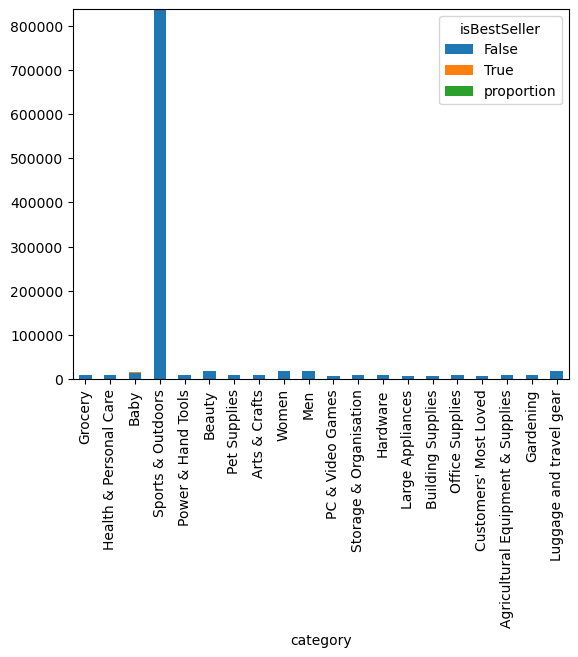

In [112]:
#Visualizations:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab.plot(kind="bar", stacked=True);


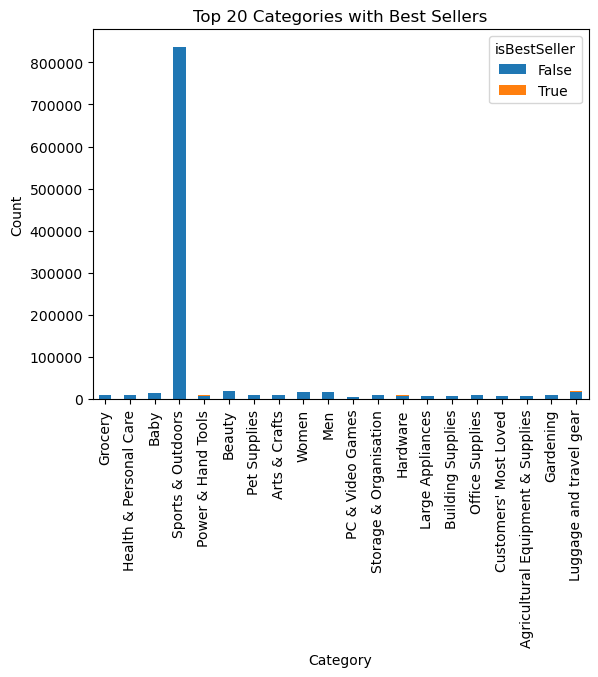

In [119]:
#Visualizations:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab = pd.crosstab(df['category'], df['isBestSeller'])
top_20= crosstab.sort_values(by=True, ascending=False).head(20)

# Plot the bar chart
ax = top_20.plot(kind="bar", stacked=True)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top 20 Categories with Best Sellers")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['False', 'True'], title="isBestSeller")

plt.show()

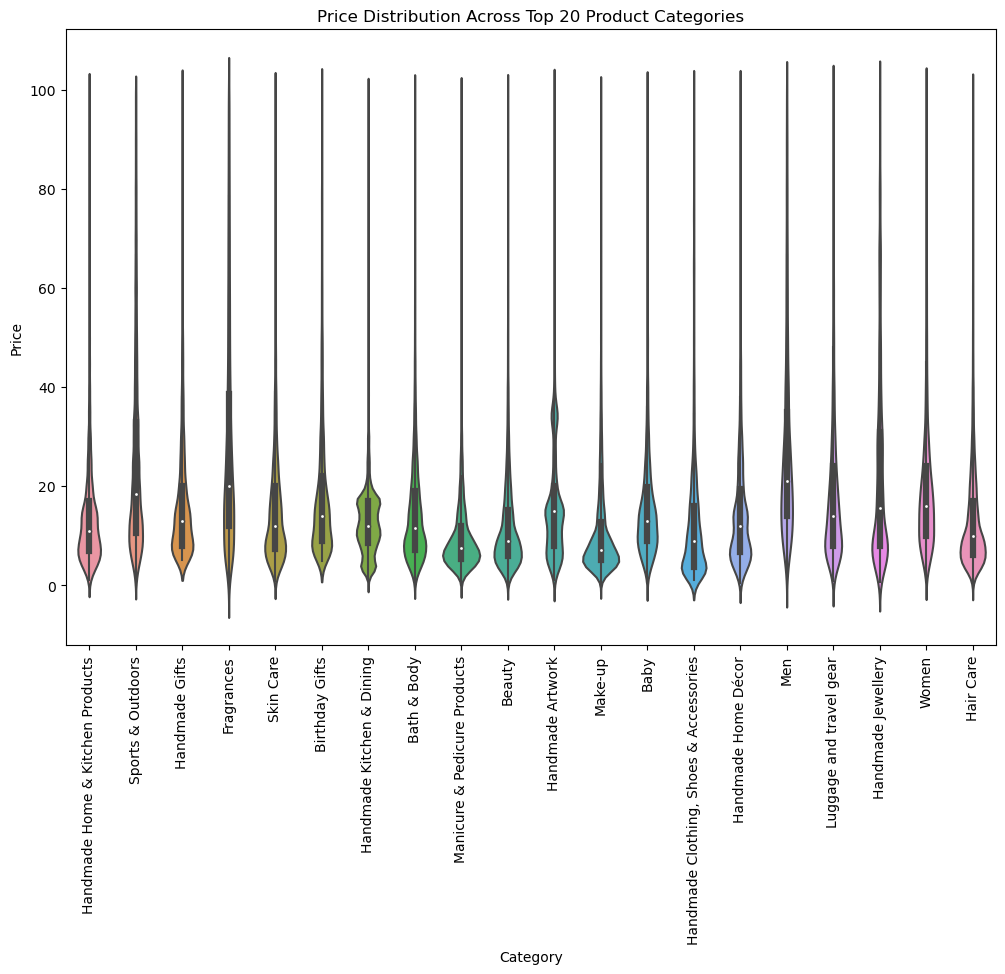

In [121]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#Objective: Investigate how different product categories influence product prices.
#Preliminary Step: Remove outliers in product prices.
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
#Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers
df_out = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


#Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
#Which product category tends to have the highest median price? Don't filter here by top categories.
t20_categories = df_out['category'].value_counts().head(20).index
df_top_20_out = df_out[df_out['category'].isin(t20_categories)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_20_out)
plt.xticks(rotation=90)
plt.title("Price Distribution Across Top 20 Product Categories")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

#This means that prices are not normally distributed and there are more extreme values in all cat, but just up to  100, black lines are very simetrical between categorias so median price is very similar in all categories.

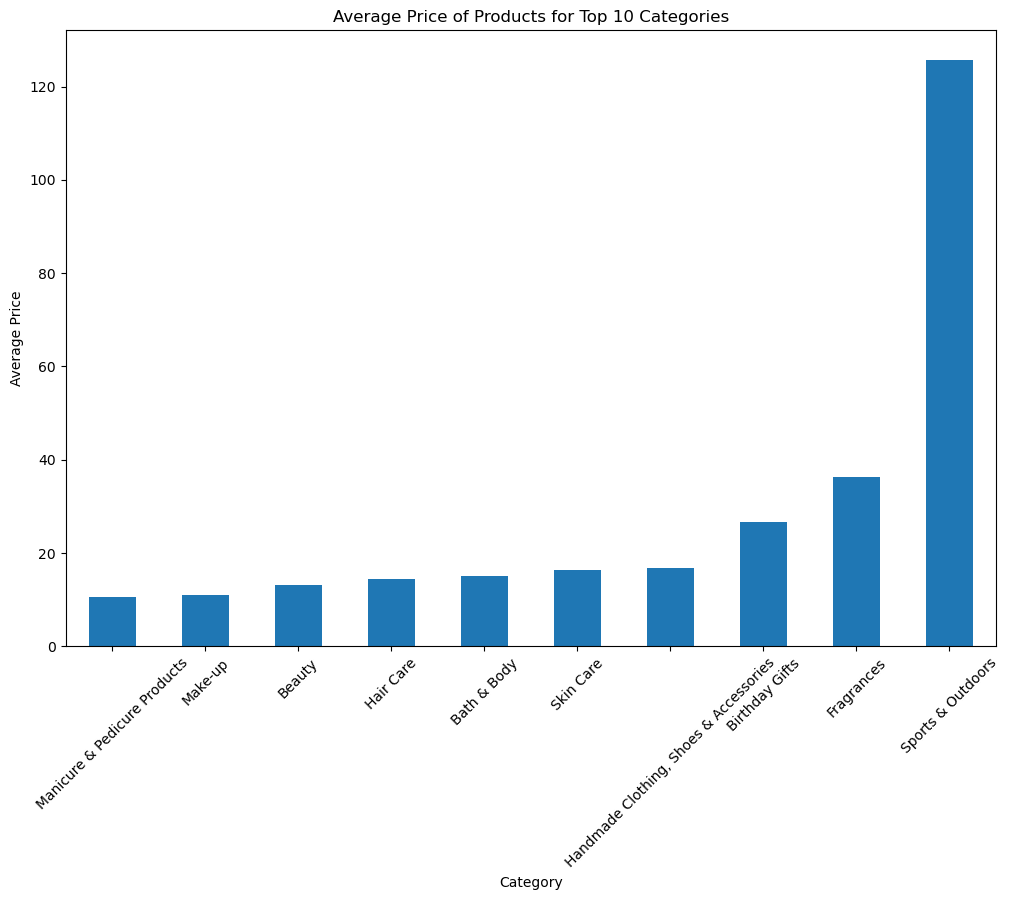

The product category with the highest average price is Sports & Outdoors with an average price of 125.77.


In [123]:
#Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.


top_10 = df['category'].value_counts().head(10).index
average_prices = df[df['category'].isin(top_10)].groupby('category')['price'].mean()


plt.figure(figsize=(12, 8))
average_prices.sort_values().plot(kind='bar')
plt.title("Average Price of Products for Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

highest_avg_price_category = average_prices.idxmax()
highest_avg_price = average_prices.max()

print(f"The product category with the highest average price is {highest_avg_price_category} with an average price of {highest_avg_price:.2f}.")

In [ ]:

sns.barplot(data=df, x='MSZoning', y='SalePrice', palette="coolwarm", hue='MSZoning', legend=False);

In [ ]:
#Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [147]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#Objective: Analyze how product ratings (stars) correlate with product prices.
#Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

#Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns
correlation_pear = df['price'].corr(df['stars'])
print(correlation_pear)

# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea'
correlation_spear = df['price'].corr(df['stars'], method='spearman')
print(correlation_spear)

#The linear relatshionship is not huge , even if the rating increases price can decrease
#The slightly higher value for Spearman correlation suggests that there might be some non-linear aspects to their relationship or the presence of outliers affecting the Pearson correlation.

-0.1249067326214869
-0.13316425462433937


In [149]:
# now im going to calculate the same without outliers

#Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns
co_pear = df_out['price'].corr(df_out['stars'])
print(co_pear)

# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea'
co_spear = df_out['price'].corr(df_out['stars'], method='spearman')
print(co_spear)

# values have decrease , more close to 0, so closer to not have a linear relationship
#Both correlation values being close to zero implies that there is little to no association between the two variables in both a linear and a monotonic sense.
#Negative values indicate that as one variable increases, the other tends to decrease slightly, but the relationship is very weak.

-0.07767299878181352
-0.06679697280768393


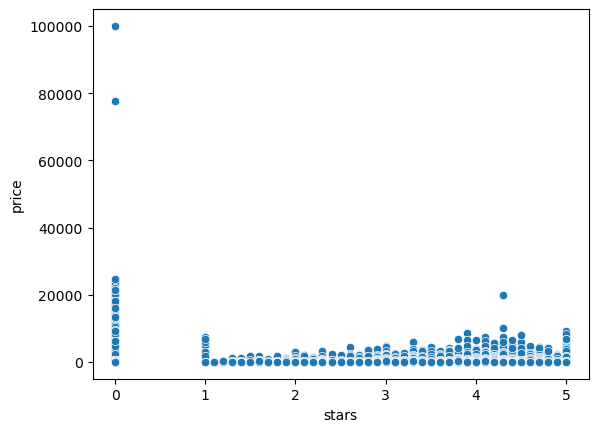

In [158]:
#Visualizations:

#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(data=df, x='stars', y='price');

#some outliers, products with super high price and really bad reviews.
# majority of products rated between 3,5 and 5


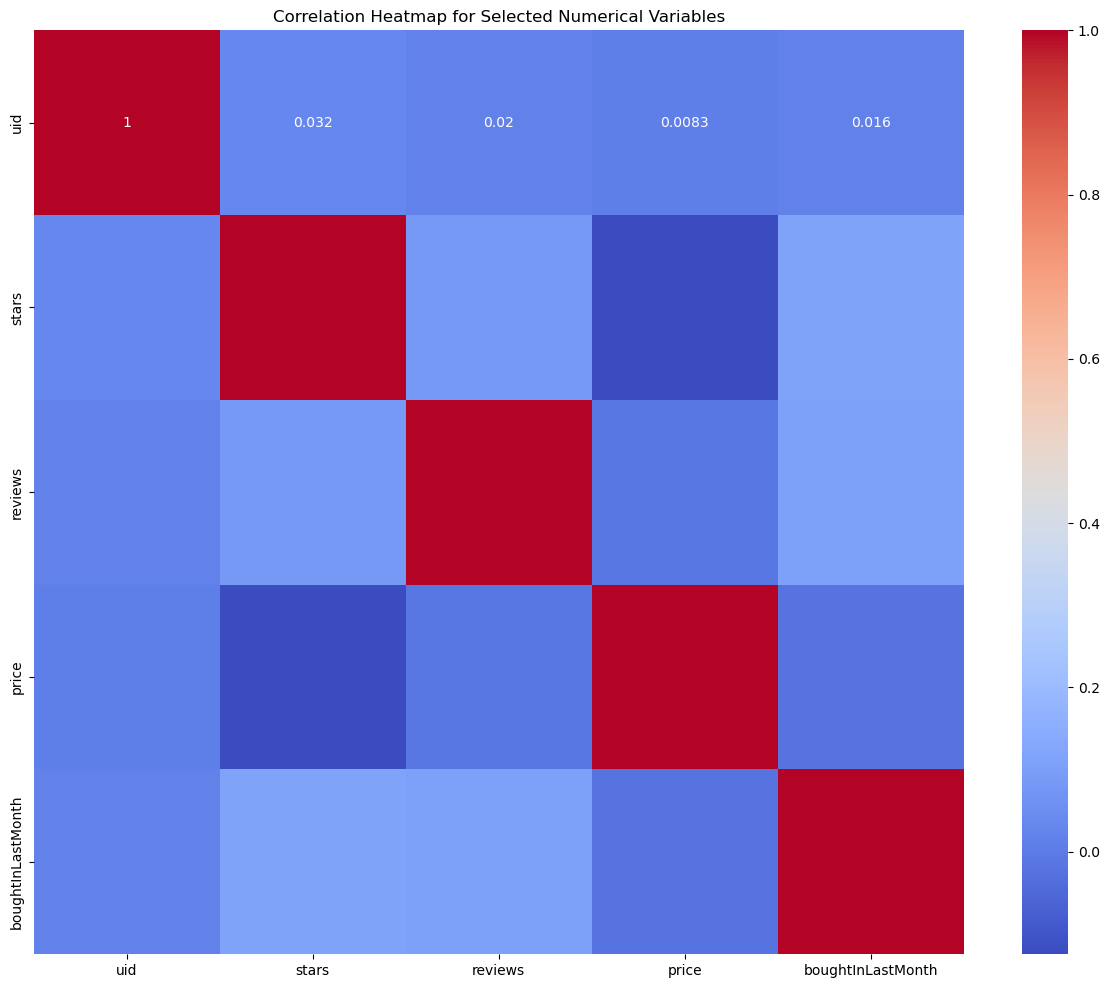

In [191]:



#Use a correlation heatmap to visualize correlations between all numerical variables

potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)


correlation_matrix = df_numerical.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

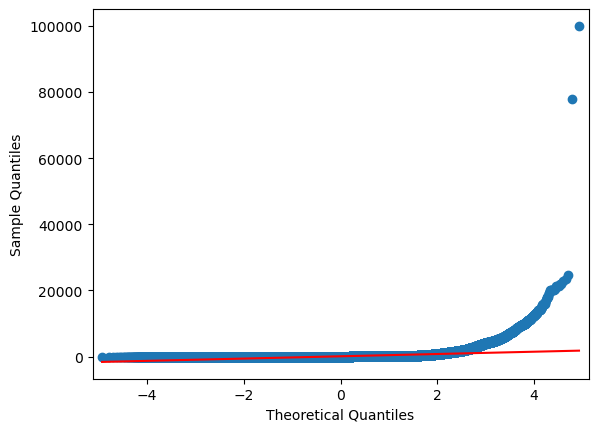

In [176]:
#Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

#observed quantiles are almost constant, implying that the observed data has very little variation.
#prices are consistently low and do not vary much from one product to another.
#maybe null prices?

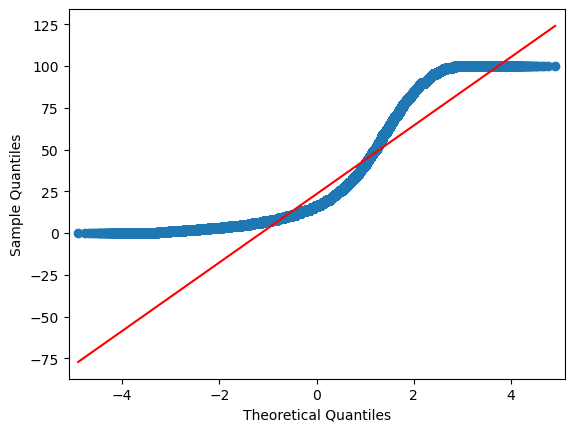

In [199]:
#Examine if product prices typically follow a normal distribution using a QQ plot without outliers
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_out['price'], line='s');

# lower tale on the left :This indicates that the distribution of SalePrice has heavier tails on the lower side than the normal distribution.
#The central portion of the data points doesn't align perfectly with the line, suggesting possible deviations from normality in the main body of the distribution as well.